In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
#Import csv data and use Pandas to create a Data Frame
cleaned_df = pd.read_csv("../../Resources/Cleaned_CVD.csv")


In [2]:
cleaned_df.head()

,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,Poor,<2,No,No,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,<1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,<1,No,No,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
#Group by Heart Disease Status
grouped_df = cleaned_df.groupby(["Heart Disease"])
grouped_df.count()


,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,
No,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883
Yes,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971


#Question: Is there a trend between different genders that exercise and the rate of those that have heart disease?

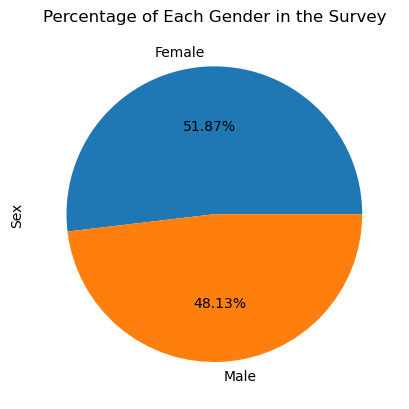

In [4]:
# Generate a pie plot showing the distribution of females versus males that took the survey
gender_percent= cleaned_df['Sex'].value_counts()
gender_percent.plot(kind='pie', autopct="%.2f%%", title="Percentage of Each Gender in the Survey")

#Save the final graph
plt.savefig("Images/males_vs_females.png")

plt.show()

To help us answer the first question, Do a higher percentage of men or women have heart disease?, the initial dataset was looked at to compare the percentage of men and women that were tested to understand if the groups being considered are of similar size. The pie graph titled "Percentage of Each Gender in the Survey" gives a visual representation of the similar sample sizes we have for men and women. The results from the analysis show us that given the similar sized sample groups we can conclude that there is a slightly higher percentage of men that have heart disease than women. If this study were to be done again, a larger sample size would help us to make a more realistic assumption on the entire population. 

In [5]:
#create a reduced data frame with just the females


female_df=cleaned_df.loc[cleaned_df['Sex']== "Female"]
female_heart=female_df.groupby(['Heart Disease']).count()

female_heart.head()

,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,
No,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298
Yes,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898


In [6]:
#create a reduced data frame with just the females

female_df=cleaned_df.loc[cleaned_df['Sex']== "Female"]
female_heart=female_df.groupby(['Heart Disease']).count()

#Find the percentage of men that have heart disease
female_yes=female_df.loc[female_df['Heart Disease'] == "Yes"]
female_yes_count=len(female_yes)
female_total=len(female_df)
print(female_total)
female_percent= round((female_yes_count / female_total) * 100,2)
print (f' {female_percent}% of the females in the survey have heart disease.')

#show the grouped female dataframe
female_heart.head()

160196
 6.18% of the females in the survey have heart disease.


,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,
No,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298,150298
Yes,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898,9898


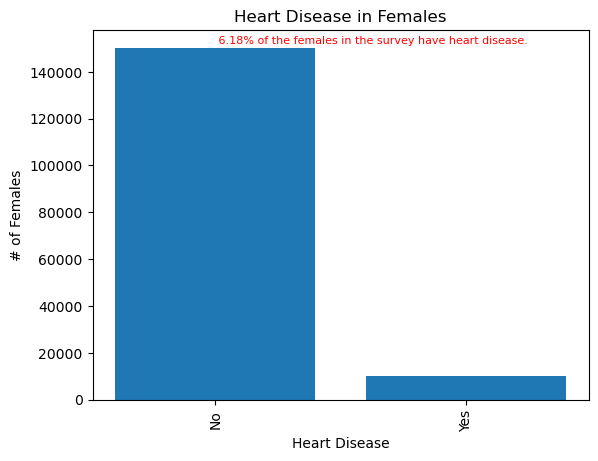

In [7]:
#Create a bar chart that compares the number of females with heart disease to the number of females without heart disease
female_chart= female_df['Heart Disease'].value_counts()
plt.bar(female_chart.index.values,female_chart.values)
plt.xlabel('Heart Disease')
plt.ylabel('# of Females')
plt.xticks(rotation=90)
plt.title("Heart Disease in Females")
plt.annotate(f' {female_percent}% of the females in the survey have heart disease.', (0,152000), color='r', fontsize=8)

#Save the final graph

plt.savefig("Images/females_vs_heart_disease.png")

#Show the chart
plt.show()


In [8]:
#create a reduced data frame with just the males

male_df=cleaned_df.loc[cleaned_df['Sex']== "Male"]
male_heart=male_df.groupby(['Heart Disease']).count()

#Find the percentage of men that have heart disease
male_yes=male_df.loc[male_df['Heart Disease'] == "Yes"]
male_yes_count=len(male_yes)
male_total=len(male_df)
print(male_total)
male_percent= round((male_yes_count / male_total) * 100,2)
print (f'There were {male_percent}% of males in the survey that have heart disease.')

#show the grouped male dataframe
male_heart.head()

148658
There were 10.14% of males in the survey that have heart disease.


,General Health,Checkup,Exercise,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,,,,,,,,,,,
No,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585,133585
Yes,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073,15073


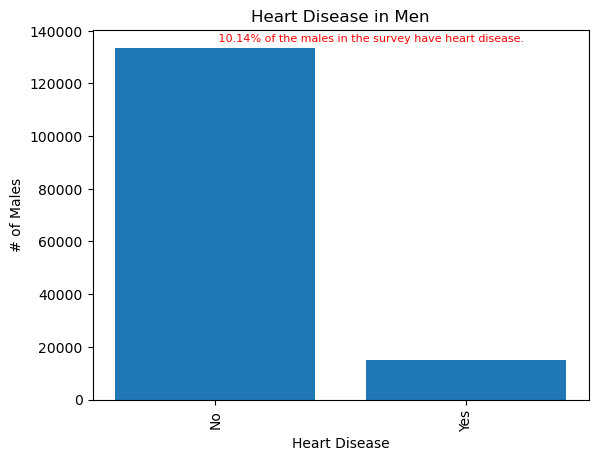

In [9]:
#Create a bar chart that compares the number of males with heart disease to the number of males without heart disease
male_chart= male_df['Heart Disease'].value_counts()
plt.bar(male_chart.index.values,male_chart.values)
plt.xlabel('Heart Disease')
plt.ylabel('# of Males')
plt.xticks(rotation=90)
plt.title("Heart Disease in Men")
plt.annotate(f' {male_percent}% of the males in the survey have heart disease.', (0,136000), color='r', fontsize=8)

#Save the final graph
plt.savefig("Images/males_vs_heart_disease.png")

#Show the chart
plt.show()

People that exercise and look at people that have heart disease vs people that dont

In [10]:
#Create a reduced dataframe including only the people that exercise

exercisers=cleaned_df.loc[cleaned_df['Exercise']== 'Yes']
exercisers

,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
6,Fair,<1,Yes,Yes,No,No,No,None,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,<1,Yes,No,No,No,No,None,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
10,Fair,<1,Yes,Yes,No,No,No,None,Yes,Female,75-79,160.0,74.84,29.23,No,0.0,30.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,<1,Yes,No,No,No,No,None,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,<5,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5+,Yes,No,No,No,Yes,Pregnacy-Induced,No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,<1,Yes,No,No,No,No,None,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [11]:
#Create a sub dataframe for people that exercise and also have heart disease
#Do the same for the people that exercise and do not have heart disease

exercise_yes=exercisers.loc[exercisers['Heart Disease']== 'Yes']
exercise_no=exercisers.loc[exercisers['Heart Disease']== 'No']

#Count the number of people in each group

exercise_hd_count=exercise_yes.count()
exercise_no_hd_count=exercise_no.count()

has_hd=exercise_hd_count["Heart Disease"]
no_hd=exercise_no_hd_count["Heart Disease"]
total_hd=has_hd+no_hd

#find percentage of people with heart disease in each group
exercise_percent= round((has_hd / total_hd) * 100,2)
exercise_percent

6.67

In [12]:
#save the data in a new pandas dictionary

subpop_heart_disease={
        "Heart Disease":has_hd,"No Heart Disease":no_hd

}
                                     
subpop_heart_disease

{'Heart Disease': 15967, 'No Heart Disease': 223414}

In [13]:
#create your variables for your graph

groups=list(subpop_heart_disease.keys())
count=list(subpop_heart_disease.values())

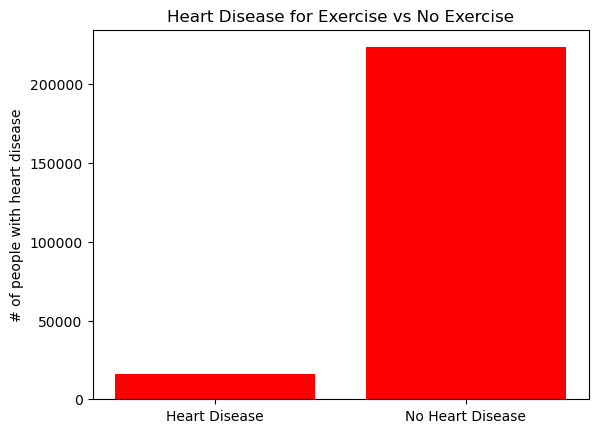

In [14]:
# Graph the results


plt.bar(range(len(subpop_heart_disease)), count, tick_label=groups, color='r')

# Set a Title and labels
plt.title("Heart Disease for Exercise vs No Exercise")
plt.ylabel("# of people with heart disease")

#Save the final graph

plt.savefig("Images/exercise_vs_heart_disease.png")



When looking at the population of people from the survey that exercise, there is a clear relationship drawn between exercise and heart disease. There are many ways to look at this data but when viewing it from the population of people that excercise, it is safe to say that the number of people that have heart disease is much smaller than the number of people that do not have heart disease. In this sample specifically, we conclude that 6.67% of those that exercise have heart disease. 
Please Note: This does not draw any concusions about the relationship or potential impact that exercise has on developing heart disease. It is simply an observation on the comparison of two variables.